- probability as a way of **quantifying the uncertainty** associated with events chosen from some universe of events.
- two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are independent.
- Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:
    - P(E,F) = P(E)P(F)
- Conditional Probability
    - the probability that E happens, given that we know that F happens
    P(E|F) = P(E,F)/P(F)
- E and F are independent
    P(E,F) = P(E|F)P(F)
    Knowing F occurred gives us no additional information about whether E occurred
    P(E|F) = P(E)


In [14]:
# %load ../common_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from jlam.py_sql import PySql
import jlam.conn_constants as cnst
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core import debugger as dbg

%load_ext autoreload
%autoreload 2

# usage pandas_profiling.ProfileReport(df)
#import pandas_profiling ;

#bidata = PySql(cnst.SVR_BIEDW,cnst.DB_BI_DATA)
#biops = PySql(cnst.SVR_BIEDW,cnst.DB_BI_OPERATIONAL)
#sfdc = PySql(cnst.SVR_BIODS,cnst.DB_SFDC_DATA)

In [1]:
import enum, random

In [2]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

In [3]:
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [5]:
both_girls = 0
older_girl = 0
either_girl = 0

In [6]:
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [7]:
print('P(both | older):', both_girls / older_girl)
print('P(both | either):', both_girls / either_girl)

P(both | older): 0.49261771747805266
P(both | either): 0.3262851856746399


# Random Variables and distributions

In [8]:
def uniform_pdf(x: float) -> float:
    ''' if x is between 0 and 1 return 1 else 0'''
    return 1 if 0 <= x < 1 else 0

In [5]:
uniform_pdf(-0.5)

0

In [7]:
uniform_pdf(-.1)

0

In [9]:
def uniform_cdf(x: float) -> float:
    '''Returns the probability that a uniform random variable is <= x'''
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x
    else: return 1 # it is always less than 1

In [10]:
import numpy as np

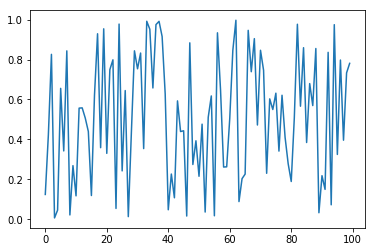

In [15]:
plt.plot(np.random.random_sample(100))

In [16]:
import math

In [21]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)

In [22]:
def normal_pdf(x: float, mu: float=0, sigma: float=1) -> float:
    ''' mu - mean, where the bell centered 
        sigma - how wide it is
    '''
    return (math.exp(-(x-mu) ** 2 / 2 / sigma **2) / (SQRT_TWO_PI * sigma))

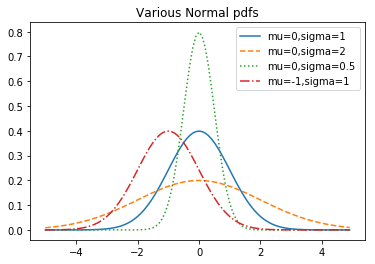

In [29]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title('Various Normal pdfs')
plt.show()

In [28]:
@interact
def plot_normal_pdf(mu=(-2,2,.5),sigma=(1,4,.5)):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,mu=mu,sigma=sigma) for x in xs],'-',label=f'mu={mu},sigma={sigma}')
    plt.legend()
    plt.title('Various Normal pdfs')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0, step=0.5), FloatSlider(value…